In [1]:
import random as rand
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
model_arr = [
104,
 154,
 91,
 92,
 92,
 87,
 134,
 149,
 94,
 105,
 103,
 145,
 92,
 90,
 93,
 84,
 88,
 77,
 85,
 102,
 90,
 94,
 85,
 78,
 75,
 84,
 85,
 78,
 64,
 40
]

In [3]:
real_arr = [107,
162,
93,
96,
91,
83,
135,
152,
92,
106,
99,
140,
89,
93,
92,
83,
84,
80,
83,
103,
93,
93,
89,
80,
75,
87,
88,
76,
67,
42]

incorrect_arr = [
208,
193,
119,
127,
114,
149,
183,
220,
176,
132,
198,
207,
149,
117,
131,
91,
93,
93,
120,
155,
134,
130,
95,
98,
78,
101,
134,
126,
79,
161,
]

In [46]:
acres = [
    2100, 7700, 25000, 43000, 17000, 16000, 3500, 1600, 5600, 35000,
    18000, 50000, 9700, 36000, 97000, 62000, 83000, 68000, 7100, 11000,
    48000, 5600, 24000, 5600, 220000, 81000, 25000, 19000, 450000, 11000
]

In [57]:
real_co2 = np.array(list(real_arr[x] * acres[x] for x in range(len(real_arr))))
incorrect_co2 = np.array(list(incorrect_arr[x] * acres[x] for x in range(len(incorrect_arr))))

In [4]:
model_arr = np.array(model_arr)
real_arr = np.array(real_arr)
incorrect_arr = np.array(incorrect_arr)

In [5]:
num_of_bins = 20
alpha = 0.7
fig = None
ax = None

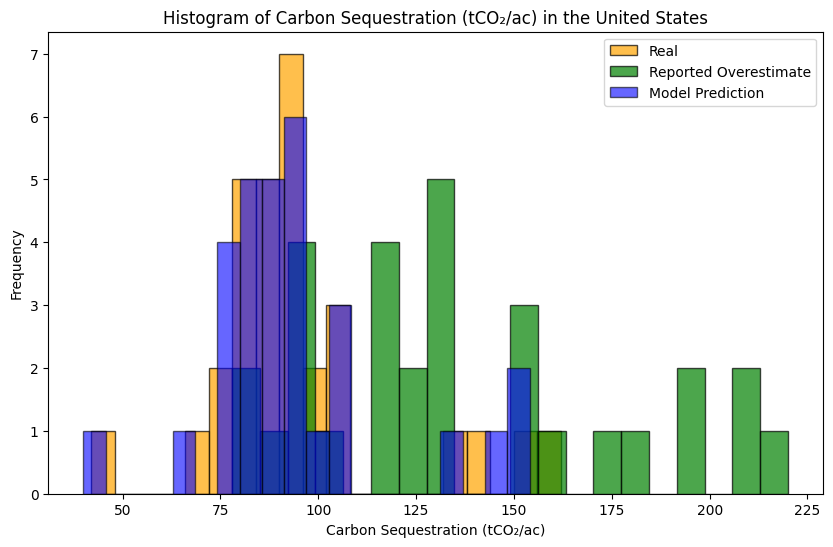

In [10]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10, 6))

ax2 = plt.subplot(111)
ax2.hist(real_arr, bins=num_of_bins, color='orange', edgecolor='black', alpha=alpha)

ax3 = plt.subplot(111)
ax3.hist(incorrect_arr, bins=num_of_bins, color='green', edgecolor='black', alpha=alpha)

ax1 = plt.subplot(111)
ax1.hist(model_arr, bins=num_of_bins, color='blue', edgecolor='black', alpha=alpha - 0.1)
ax1.set_title(u"Histogram of Carbon Sequestration (tCO\u2082/ac) in the United States")
ax1.set_xlabel(u"Carbon Sequestration (tCO\u2082/ac)")
ax1.set_ylabel("Frequency")

ax.legend(['Real', 'Reported Overestimate', 'Model Prediction'], loc='upper right')
plt.show()


In [48]:
overestimation_per_acre = incorrect_arr - real_arr

In [51]:
incorrect_co2

array(<generator object <genexpr> at 0x7faf51fbc6d0>, dtype=object)

In [58]:
overestimation_co2 = incorrect_co2 - real_co2

In [64]:
overestimation_prop = real_co2 / incorrect_co2

(array([13., 10.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 100800.,  630720., 1160640., 1690560., 2220480., 2750400.,
        3280320., 3810240., 4340160., 4870080., 5400000.]),
 <BarContainer object of 10 artists>)

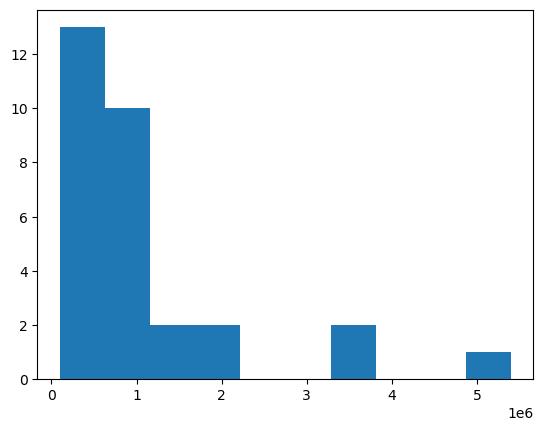

In [59]:
plt.hist(overestimation_co2)

In [17]:
simulation = np.random.normal(np.mean(model_arr), np.std(model_arr), 150)

In [18]:
simulation_of_mean = st.norm(np.mean(simulation), np.std(simulation))

print(np.mean(simulation))
print(np.std(simulation))

93.561185025608
21.28366169661383


In [43]:
#Monte Carlo Simulation
def monte_carlo(arr, sim_n = 1000):
    n = 30
    avg_arr = []


    for k in range(sim_n):
        avg = 0
        for i in range(n):
            avg += np.random.choice(arr)
        avg_arr.append(avg / n)
    return avg_arr


(array([ 13.,  49., 153., 232., 240., 175.,  90.,  36.,  11.,   1.]),
 array([ 82.53333333,  85.33666667,  88.14      ,  90.94333333,
         93.74666667,  96.55      ,  99.35333333, 102.15666667,
        104.96      , 107.76333333, 110.56666667]),
 <BarContainer object of 10 artists>)

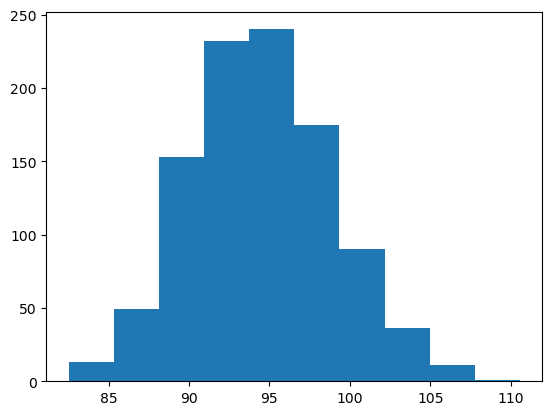

In [25]:
plt.hist(monte_carlo(model_arr))

42.00264666666667

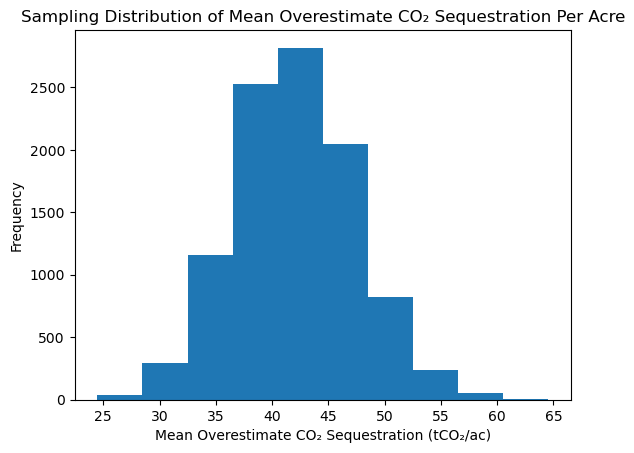

In [62]:
data = monte_carlo(overestimation_per_acre, sim_n=10000)
plt.hist(data)
plt.title(u"Sampling Distribution of Mean Overestimate CO\u2082 Sequestration Per Acre")
plt.xlabel("Mean Overestimate CO\u2082 Sequestration (tCO\u2082/ac)")
plt.ylabel("Frequency")
np.mean(data)

1062196.019

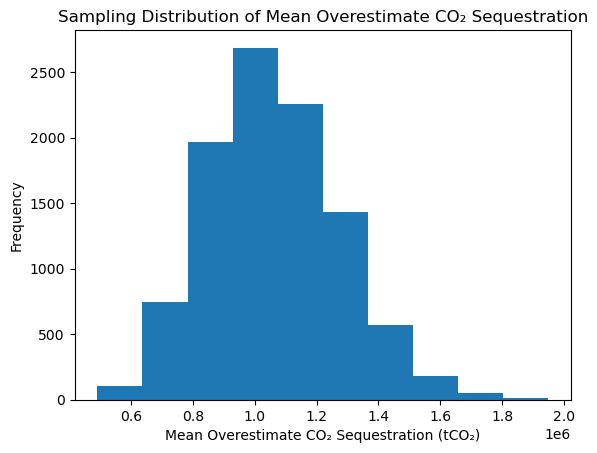

In [63]:
data = monte_carlo(overestimation_co2, sim_n=10000)
plt.hist(data)
plt.title(u"Sampling Distribution of Mean Overestimate CO\u2082 Sequestration")
plt.xlabel("Mean Overestimate CO\u2082 Sequestration (tCO\u2082)")
plt.ylabel("Frequency")
np.mean(data)

0.7214907587598124

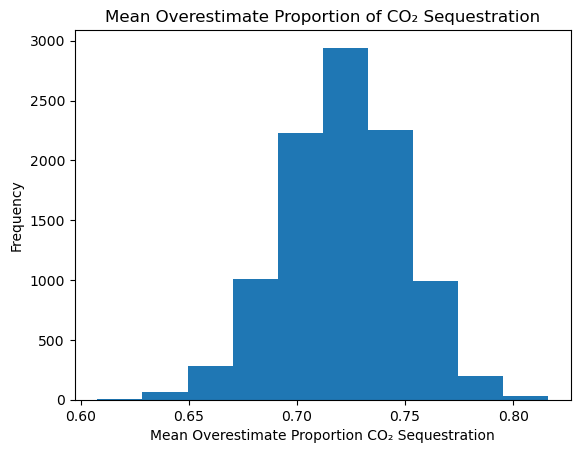

In [65]:
data = monte_carlo(overestimation_prop, sim_n=10000)
plt.hist(data)
plt.title(u"Mean Overestimate Proportion of CO\u2082 Sequestration")
plt.xlabel("Mean Overestimate Proportion CO\u2082 Sequestration")
plt.ylabel("Frequency")
np.mean(data)

In [61]:
print("mean real co2:", np.mean(monte_carlo(real_co2)))
print("mean incorrect co2:", np.mean(monte_carlo(incorrect_co2)))

mean real co2: 4041141.983333333
mean incorrect co2: 5149685.28


In [22]:
print(np.mean(overestimation_arr))
print(np.mean(monte_carlo(overestimation_arr)))

41.93333333333333
41.9462


In [38]:
simulation = monte_carlo(model_arr)
print(np.mean(simulation), np.std(simulation))
print(np.mean(model_arr), np.std(model_arr))
# simulation = np.random.normal(np.mean(model_arr), np.std(model_arr), 150)

94.62166666666667 4.338729396698736
94.46666666666667 23.62588034808909


In [37]:
null_hypothesis = np.mean(real_arr)
print(null_hypothesis)
t = (np.mean(simulation) - null_hypothesis) / (np.std(simulation) / np.sqrt(len(simulation)))
t

95.1


-3.318121824950328

-3.4845831009527655
0.000514300531950417


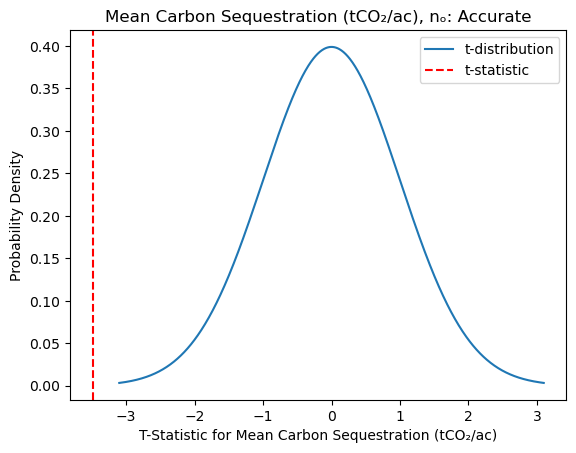

In [39]:
t_statistic, p_value = st.ttest_1samp(simulation, null_hypothesis)

print(t_statistic)
print(p_value)
# Plot the t-distribution
degrees_of_freedom = len(simulation) - 1
x = np.linspace(st.t.ppf(0.001, degrees_of_freedom), st.t.ppf(0.999, degrees_of_freedom), 1000)
y = st.t.pdf(x, degrees_of_freedom)

plt.plot(x, y, label='t-distribution')

# Highlight the t-statistic on the plot
plt.axvline(t_statistic, color='red', linestyle='--', label='t-statistic')

# Set labels and title
plt.xlabel(u'T-Statistic for Mean Carbon Sequestration (tCO\u2082/ac)')
plt.ylabel('Probability Density')
plt.title(u'Mean Carbon Sequestration (tCO\u2082/ac), n\u2092: Accurate')

# Add legend
plt.legend()

# Show the plot
plt.show()

Text(0, 0.5, 'Probability')

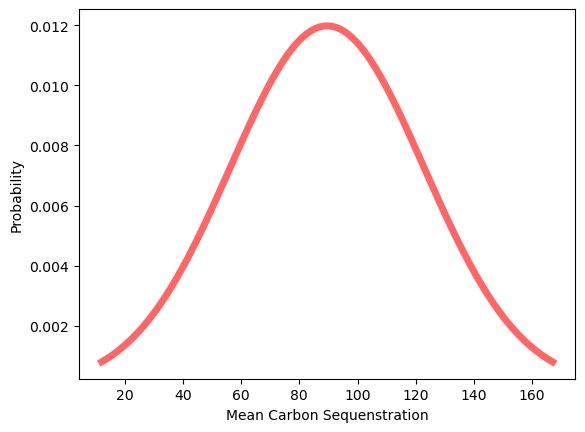

In [8]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(simulation_of_mean.ppf(0.01),
                simulation_of_mean.ppf(0.99),100)
                
ax.plot(x, simulation_of_mean.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set_xlabel("Mean Carbon Sequenstration")
ax.set_ylabel("Probability")

In [9]:
#Probability of getting a value of carbon_sequestration
carbon_sequestration = 210 #the study's value or the over estimates
1-simulation_of_mean.cdf(carbon_sequestration)


0.00014978881761074092

In [10]:
#One Attempt, This is much more sketch
tree_carbon_seq = simulation #30 tree data
null_hypothesis = 184 # the studies result
st.ttest_1samp(tree_carbon_seq, null_hypothesis)

TtestResult(statistic=-34.60656374426913, pvalue=4.106599267304717e-73, df=149)

In [67]:
t_statistic = st.t.ppf(0.95, 29)

In [73]:
data = monte_carlo(model_arr)
mean = np.mean(data)
std = np.std(data)
upper_bound = mean + t_statistic * std / np.sqrt(30)
lower_bound = mean - t_statistic * std / np.sqrt(30)
[lower_bound, upper_bound]

[93.1613911565163, 95.70347551015037]

In [75]:
np.mean(real_arr)

95.1

In [76]:
np.mean(incorrect_arr)

137.03333333333333